In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Figures and Subplots

Plots in matplotlib reside within a `figure` object.

You can create a new figure with `plt.figure`.

***This means that the figure should be 2 x 2, and we're selecting the first of 4 subplots (numbered from 1).***

When you issue a plotting command like `plt.plot([1.5, 3.5, -2, 1.6])`, matplotlib **`draws on the last figure and subplot`** used (creating one if necessary), thus hiding the figure and subplot creation.

The `"k--"` is a style option instructing matplotlib to plot black dashed line.

The objects returned by `fig.add_subplot` above are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one's instance methods.

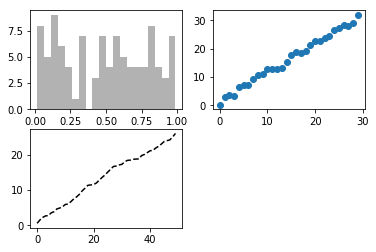

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.rand(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.rand(30))
plt.plot(np.random.rand(50).cumsum(), 'k--')
#ax3.plot(np.random.rand(50).cumsum(), 'k--')

***Since creating a figure with multiple subplots according a particular layout is such a common task, there is a convenience method, `plt.subplots`, that creats a new figure and returns a `Numpy` array containing the created subplot objects.***

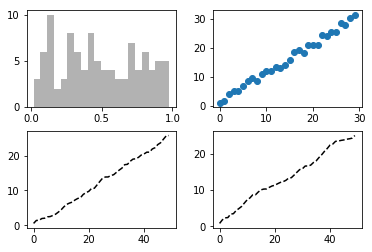

In [3]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

axes[0, 0].hist(np.random.rand(100), bins = 20, color = 'k', alpha = 0.3)
axes[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.rand(30))
axes[1, 0].plot(np.random.rand(50).cumsum(), 'k--')
axes[1, 1].plot(np.random.rand(50).cumsum(), 'k--')

plt.subplots_adjust(left =  None, bottom = None, right = None, top = None,
                   wspace = 0.25, hspace = 0.25)

***This is very useful as the `axes` array can be easily indexed like a two-dimensional array. for example, axes[0, 1].***

You can alse indicate that subplots should have the same X or Y axis using `sharex` and `sharey`, respectively.

This is especially  useful when comparing data on the same scale.

***`sharex`***: All subplots should use the same X-axis ticks(adjusting the xlim will affect all subplots)

***`sharey`***: All subplots should use the same X-axis ticks(adjusting the xlim will affect all subplots)

### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots.

This spacing is all specified relative to the high and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. 

***`wspace` and `hspace` controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.***

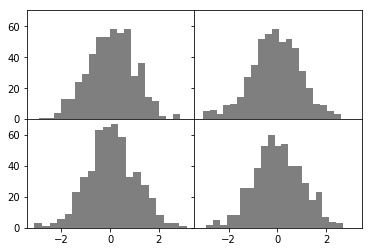

In [4]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i, j].hist(np.random.randn(500), bins = 20, 
                        color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

### Colors, Markers and Line Styles

Matplotlib's main `plot` function accepts arrays of X and Y coordinates and optionally a string abbreviation indicating color and line style.

Line plots can additionally have `markers` to highlight the acrual data points.

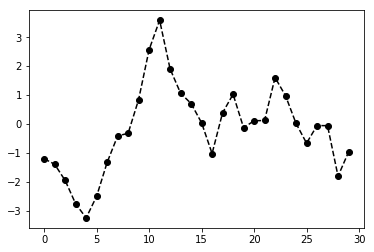

In [5]:
#plt.plot(np.random.randn(30).cumsum(), 'ko--')
plt.plot(np.random.randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

For line plots, you will notice that subsequent points are linearly interpolated by default.

This can be altered with the `drawstyle` option.

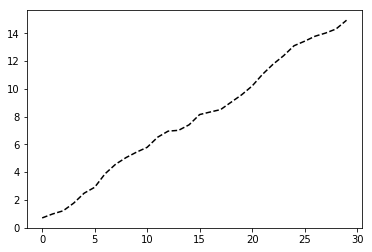

In [6]:
np.random.seed(123)

data = np.random.rand(30).cumsum()
plt.plot(data, 'k--', label = 'Default')

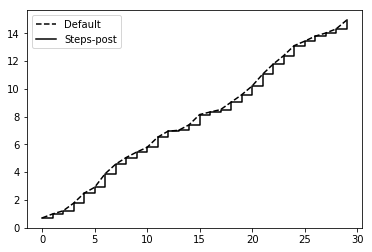

In [7]:
plt.plot(data, linestyle = '--', label = 'Default', color = 'black')
plt.plot(data, 'k-', drawstyle='steps-post', label='Steps-post')
plt.legend(loc = 'best')

### Tricks, Labels, and Legends

***All such methods act on the active or most recently-created `AxesSubplot`.***

Each of them corresponds to two methods on the subplot object itself.

In the case of `xlim` these are `ax.get_xlim` and `ax.set_lim`.

### Setting the title, axis label, and tricklabels

To change the **X axis ticks**, it's easiest to use `set_xticks` and `set_xticklabels`.

The former instructs matplotlib where to place the ticks along the data range.

By default these locations will alse be the labels. But we can set any other values as the labels using `set_xtricklabels`.

Text(0.5,0,'Stages')

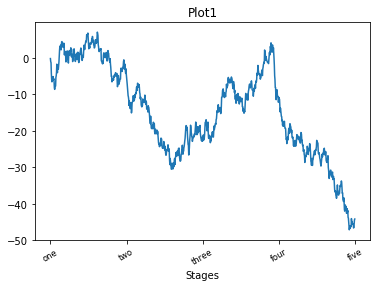

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
              rotation = 30, fontsize = 'small')
ax.set_title(label = 'Plot1')
ax.set_xlabel(xlabel = 'Stages')

Text(100,-15,'Hello World!')

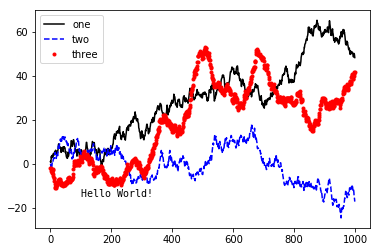

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label = 'one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label = 'two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label = 'three')
ax.legend(loc = 'best')
ax.text(x = 100, y = -15, s = 'Hello World!', 
        family = 'monospace', fontsize = 10)

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes.


`Annotations` can draw both `text` and `arrows` arranged appropriately.

In [11]:
from datetime import datetime

In [12]:
data = pd.read_csv(filepath_or_buffer = ".\\pydata-book\\examples\\spx.csv",
                   index_col = 0, 
                   parse_dates = True)
data.head(5)
spx = data['SPX']

In [13]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

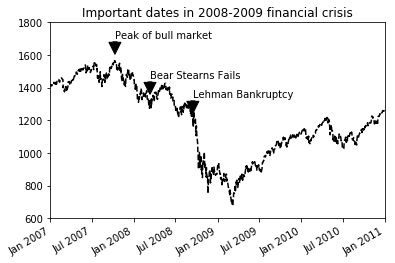

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(spx, 'k--')
spx.plot(ax = ax, style = 'k--')

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 50),
                xytext = (date, spx.asof(date) + 200), 
                arrowprops = dict(facecolor = 'black'),
                horizontalalignment ='left', 
                verticalalignment ='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_xticklabels(['Jan 2007', 'Jul 2007', 'Jan 2008', 'Jul 2008',
                    'Jan 2009', 'Jul 2009', 'Jan 2010', 'Jul 2010',
                    'Jan 2011'], rotation = 30)

ax.set_title('Important dates in 2008-2009 financial crisis')

***Choose data by datetime index***

In [15]:
spx.asof([datetime(2007, 10, 11), datetime(2008, 3, 12)])

2007-10-11    1554.41
2008-03-12    1308.77
Name: SPX, dtype: float64

Drawing sahpes requires some more care. matplotlib has objects that represent many common shapes, referred to as `patches`.

Some of these, like `Rectangle` and `Circle` are found in `matplotlib.pyplot`, but the full set is located `matlib.patches`

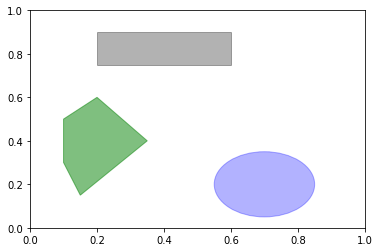

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6], [0.1, 0.5], [0.1, 0.3]], 
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

The file type is infered from the file extension.

So if you used `.pdf` instead you would get a PDF.

There are a couple of important options that I use frequently for publishing graphics.

***`dpi`, which controls the dots-per-inch resolution, and `bbox_inches`, which can trim the whitespace around the actual figure.***

In [17]:
plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')

`savefig` doesn't have to write to disk, it can also write to any file-like object, such as a `StringIO`.

In [19]:
from io import StringIO

In [26]:
buffer = StringIO()
#plt.savefig(buffer)
#plot_data = buffer.getvalue()
#plot_data
buffer

### matplotlib Configuration

matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication.

Fortunately, nearly all of the default behavior can be customized via an extensive set of global parameters govening figure size, subplot spacing, colors, font size, grid styles, and so on.

There are two main ways to interact with the matplotlib configuration system.

***The first is programmatically from Python using the `rc` method.***

To set the global default figure size to be 10 x 10.

***The fiest argument to `rc` is the componrnt you wish to customize, such as `figure`, `axes`, `xtick`, `ytick`, `grid`, `legend` or many others.***

Text(0.5,1,'fjsdi')

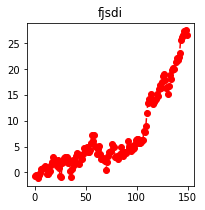

In [19]:
plt.rc('figure', figsize = (3, 3))

#font_options = {'family': "monospace", 'weight': 'bold'}
#plt.rc('font', **font_options)

plt.plot(np.random.randn(150).cumsum(), 'ro--')
plt.title("fjsdi")

### Plotting Function in Pandas

`Series` and `DataFrame` each have a `plot` method for making many different plot types.

The `Series` object's index is passed to matplotlib for plotting on the X axis, though this can be disable by passing `use_index = False`.

***The X axis ticks and limits can be adjusted using the `xticks` and `xlim` options, and Y axis respectively using `ytick`, and `ylim`.***

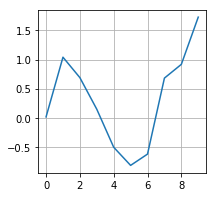

In [24]:
s = pd.Series(data = np.random.randn(10).cumsum(), 
              index = np.arange(0, 100, 10))
s.plot(use_index = False, grid = True)

***Most of pandas's plotting method accept an optional `ax` parameter, which can be a matplotlib subplot object.***

This gives you more flexible placement of subplots in a grid layout.

***DataFrame's `plot` method plots `each of its column as a different line on the same subplot`, creating a legend automatically.***

***`ax`: matplotlib subplot object to plot on. If nothing passing, use active matplotlib subplot. ***

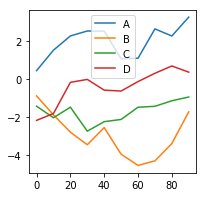

In [21]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

DataFrame has a number of opertions allowing some flexibility with how the columns are handle.

`subplots`: Plot each DataFrame column in separate subplot

`layout`: for the layout of subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C56FF60>,
      dtype=object)

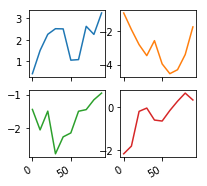

In [26]:
df.plot(subplots = True, layout = (2, 2), legend = False)

### Bar plot

Making bar plots instead of line plots is a simple as passing `kind = "bar"`(for vertical bars) or `kind = barh`(for horizontal bars).

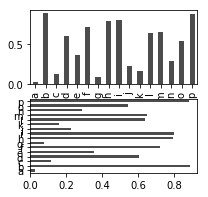

In [27]:
fig, axes = plt.subplots(2, 1) # retrun two objects

data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

data.plot(kind = 'bar', ax = axes[0], color = 'k', alpha = 0.7)

data.plot(kind = 'barh', ax = axes[1], color = 'k', alpha = 0.7)

With a Dataframe, bar plots group the values in each row together in a group in bars, side by side, for each values.

In [28]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.503722,0.107152,0.876052,0.167756
two,0.575142,0.808933,0.800402,0.257672
three,0.545981,0.542217,0.454492,0.963946
four,0.389008,0.276098,0.648245,0.742631
five,0.091603,0.587910,0.011912,0.078128
six,0.747643,0.807025,0.164556,0.728356


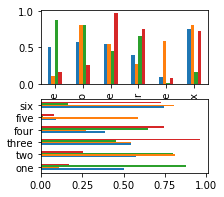

In [29]:
# Note that the name "Genus" on the DataFrame's columns is used to title the legend.
fig, axes = plt.subplots(2, 1)
df.plot(kind = 'bar', ax = axes[0], legend = False)
df.plot(kind = 'barh', ax = axes[1], legend = False)

***Stacked bar plots are created from DataFrame by passing `stack = True`, resulting the value in each row being stacked together.***

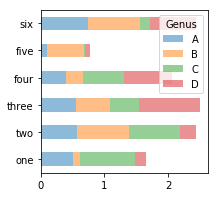

In [30]:
df.plot(kind = 'Barh', stacked = True, alpha = 0.5)

In [35]:
tips = pd.read_csv('.\\pydata-book\\examples\\tips.csv')
party_counts = pd.crosstab(index = tips['day'], columns = tips['size'], rownames = ['day'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [32]:
party_counts = party_counts.iloc[:, 2:5]
party_counts

size,3,4,5
day,,,
Fri,1,1,0
Sat,18,13,1
Sun,15,18,3
Thur,4,5,1


***Normalize so that each row sums to 1 and make the plot.***

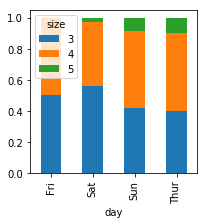

In [33]:
party_pcts = party_counts.div(party_counts.sum(axis = 1), axis = 0)
party_pcts.plot(kind = 'bar', stacked = True)

### Histograms and Density Plots

A related plot type is a `desity` plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data.

A usual procedure is to approximate this distrubution as a mixture of `kernals`, that is, simple distributions like the normal(Gaussian) distribution.

***Thus, density plots are also known as `KDE(kernal density estimate)` plots.***

Using `plot` with `kind = "kde"` makes a density plot using the standard mixture-of-normal `KDE`.

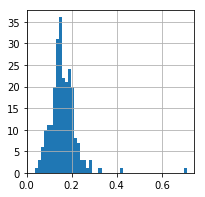

In [37]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins = 50)

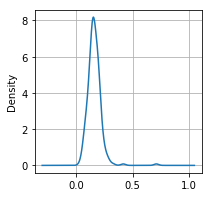

In [41]:
tips['tip_pct'].plot(kind = 'kde', grid = True)

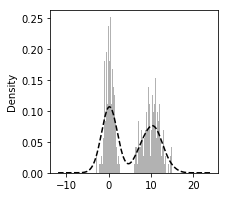

In [51]:
comp1 = np.random.normal(0, 1, size = 200) # N(0, 1)
comp2 = np.random.normal(10, 2, size = 200) # N(10, 4)

values = pd.Series(np.concatenate([comp1, comp2]))

values.hist(bins = 100, alpha = .3, normed = True, color = 'k')
values.plot(kind = 'kde', style = 'k--')

### Scatter Plots

Scatter plot are a useful way of examining the relationship between two one-dimensional data series.

In [61]:
macro = pd.read_csv(".\\pydata-book\\examples\\macrodata.csv")
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()
trans_data.head(5)

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5,1,'Changes in log m1 vs. log unemp')

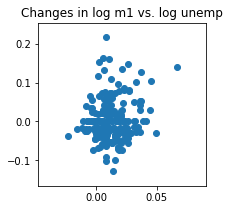

In [64]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In `EDA(exploratory data analysis)` it's helpful to be able to look at all the scatter plots among a group of variables.

This is known as a `pairs` plot or `scatter` plot `marix`.

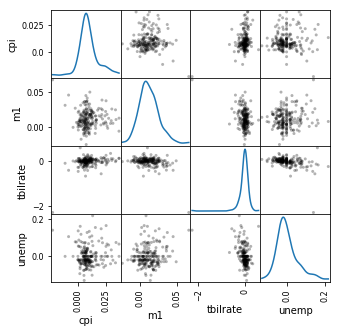

In [72]:
#plt.figure(figsize = (10, 10))
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', 
                           alpha=0.3, figsize = (5, 5))
plt.show()

### Plotting Maps: Visualizating Hatit Earthquake Crisis Data

In [87]:
data = pd.read_csv('.\\pydata-book\\datasets\\Haiti\\Haiti.csv')
data.head(3)

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO


In [88]:
data[['INCIDENT DATE', "LATITUDE", "LONGITUDE"]].head(3)

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287


In [83]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [89]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


Some of the categories are missing, so we might want to drop these data points.

Cleaning the bad locations and removing the missing categories is now fairly simple.

In [100]:
print(data.isnull().sum(0))

df = data[(data['LATITUDE'] > 18) & (data['LATITUDE'] < 20) & 
          (data['LONGITUDE'] > -75) & (data["LONGITUDE"] < -70) & 
          (data['CATEGORY'].notnull())]
df.head(3)

Serial            0
INCIDENT TITLE    0
INCIDENT DATE     0
LOCATION          1
DESCRIPTION       0
CATEGORY          6
LATITUDE          0
LONGITUDE         0
APPROVED          0
VERIFIED          0
dtype: int64


,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO


In [107]:
def to_cat_list(castr):
    stripped = (x.strip() for x in castr.split(","))
    return [x for x in stripped if x]

In [125]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [126]:
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
        return code, names.strip()

In [127]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')